In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import cvxpy as cp
import itertools as it
import Metrics as met
import binary_graph_learning as bgl

In [3]:
# Number of Nodes
N = 20
# Number of Signals
M = 100
# Seed for reproducibility 
seed = 123

# Ground truth graph
G = nx.fast_gnp_random_graph(N, .3, seed = seed)
np.random.seed(seed)

# Set random wieghts for the edges
for s,t in G.edges:
    G[s][t]['weight'] = np.random.uniform(0,1)
    
L = nx.laplacian_matrix(G).toarray()
A = nx.adjacency_matrix(G).toarray()

# Normalized adjacency matrix
A = (N/sum(np.diag(L)))*A

In [11]:
graphs = [nx.fast_gnp_random_graph(N,.2, seed = seed + i) for i in range(100)]
adj_mats = [nx.adjacency_matrix(G) for G in graphs]
hs = []
for i in range(100):
    np.random.seed(seed + i)
    hs.append(np.random.uniform(-1,1,N))
# Generate synthetic signals
syn_sigs = []
for i in range(100):
    Y = []
    for i in range(M):
        signal = bgl.generate_signal(hs[i],adj_mats[i])
        Y.append(signal)
    Y = np.transpose(Y)
    syn_sigs.append(Y)

In [12]:
est_As = [bgl.binary_graph_learning(Y,0) for Y in syn_sigs] 

CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.


In [15]:
for e in est_As:
    print(met.ComputeMetrics(e[9], A, .1))

{'Precision': 0.35789473684210527, 'Recall': 1.0, 'F-Measure': 0.5271317829457365, 'Relative Error': 0.9852267513881119, 'SSE': 0.9706717516507725}
{'Precision': 0.35789473684210527, 'Recall': 1.0, 'F-Measure': 0.5271317829457365, 'Relative Error': 0.9832427951666611, 'SSE': 0.9667663942471487}
{'Precision': 0.35789473684210527, 'Recall': 1.0, 'F-Measure': 0.5271317829457365, 'Relative Error': 0.9869260836128516, 'SSE': 0.9740230945154014}
{'Precision': 0.35789473684210527, 'Recall': 1.0, 'F-Measure': 0.5271317829457365, 'Relative Error': 0.9792482127323878, 'SSE': 0.9589270621395759}
{'Precision': 0.35789473684210527, 'Recall': 1.0, 'F-Measure': 0.5271317829457365, 'Relative Error': 0.9945267019869036, 'SSE': 0.9890833609649474}
{'Precision': 0.35789473684210527, 'Recall': 1.0, 'F-Measure': 0.5271317829457365, 'Relative Error': 0.9901646873758881, 'SSE': 0.9804261081261902}
{'Precision': 0.35789473684210527, 'Recall': 1.0, 'F-Measure': 0.5271317829457365, 'Relative Error': 0.975685853

In [3]:
# Create ground truth h
np.random.seed(seed)
h = np.random.uniform(-1,1,N)
alpha = .2

In [4]:
# Generate synthetic signals
Y = []
for i in range(M):
    signal = bgl.generate_signal(h,A)
    Y.append(signal)
    temp = {n:signal[n] for n in G.nodes()}
    nx.set_node_attributes(G, temp, name = "Round " + str(i+1))
Y = np.transpose(Y)
Y.shape

(20, 100)

In [12]:
# Create mesh for parameter optimization and run the optamization
alpha = np.linspace(0,1,10)
estimates = []
for a in alpha:
    est = bgl.binary_graph_learning(Y, a)
    estimates.append((est,a))

CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.
CP variables built.


In [17]:
for e in estimates:
    print(met.F_Measure(e[0][9], A, .1))

0.5271317829457365
-1
-1
-1
-1
0.028985507246376812
-1
-1
-1
-1


In [6]:
mean = np.mean(estimates[0][0][9])
sd = np.std(estimates[0][0][9])

380


(array([328.,   2.,  42.,   8.,   4.,  10.,   0.,   0.,   0.,   6.]),
 array([ 0.        ,  2.70088279,  5.40176558,  8.10264836, 10.80353115,
        13.50441394, 16.20529673, 18.90617952, 21.60706231, 24.30794509,
        27.00882788]),
 <BarContainer object of 10 artists>)

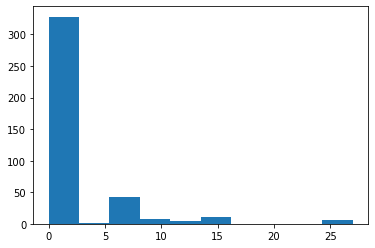

In [35]:
print(len([i for i in estimates[0][0][9].flatten('F') if i > 0]))
plt.hist(estimates[0][0][9].flatten('F'))

328


(array([ 20.,   0.,   0.,   0.,   0.,   0.,  10., 158., 122.,  18.]),
 array([0.        , 0.22274282, 0.44548564, 0.66822846, 0.89097129,
        1.11371411, 1.33645693, 1.55919975, 1.78194257, 2.00468539,
        2.22742821]),
 <BarContainer object of 10 artists>)

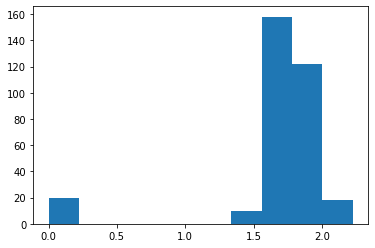

In [37]:
data = [i for i in estimates[0][0][9].flatten('F') if i < 5]
print(len(data))
plt.hist(data)

2.3348804976410893


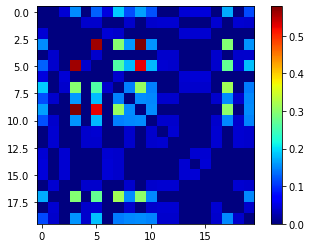

In [40]:
# Heat map of learned adjacency matrix
# Note this is a poor alpha value
est_A = estimates[0][0][9]
for i in range(len(est_A)):
    for j in range(len(est_A[i])):
        if est_A[i][j] < 1.8:
            est_A[i][j] = 0
print(np.mean(est_A))
est_A = ((N)/sum(est_A@np.ones(N)))*est_A
im1 = plt.imshow(est_A, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.show()

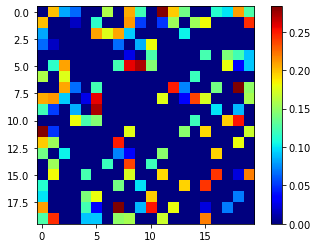

In [9]:
# Heat map of ground truth
im1 = plt.imshow(A, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.show()

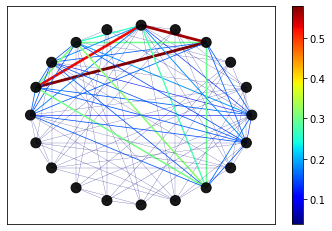

In [41]:
est_G = nx.from_numpy_matrix(est_A)
edges,weights = zip(*nx.get_edge_attributes(est_G,'weight').items())

nodes = est_G.nodes()
node_color = ['black']*len(signal)
size = [w*5 for w in weights]
pos = nx.circular_layout(est_G)
ec = nx.draw_networkx_edges(est_G, pos, 
                            edgelist=edges, 
                            edge_color=weights, 
                            width=size,
                            edge_cmap=plt.cm.jet)
nc = nx.draw_networkx_nodes(est_G,pos,
                            nodelist=nodes,
                            node_color=node_color, 
                            node_size = 100,
                            alpha = .9)
plt.colorbar(ec)

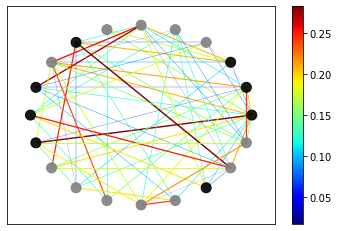

In [42]:
G = nx.from_numpy_matrix(A)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
nodes = G.nodes()
node_color = ['grey']*len(signal)
for i in range(len(signal)):
    if signal[i] == 1:
        node_color[i] = 'black'
size = [w*5 for w in weights]
pos = nx.circular_layout(G)
ec = nx.draw_networkx_edges(G, pos, 
                            edgelist=edges, 
                            edge_color=weights, 
                            width=size,
                            edge_cmap=plt.cm.jet)
nc = nx.draw_networkx_nodes(G,pos,
                            nodelist=nodes,
                            node_color=node_color, 
                            node_size = 100,
                            alpha = .9)
plt.colorbar(ec)

In [44]:
print(G.number_of_edges(), est_G.number_of_edges())

68 93
